In [112]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("ventas").getOrCreate()

In [114]:
import matplotlib.pyplot as plt

In [116]:
import pandas as pd

In [118]:
df = spark.read.csv("ventas_enero_2019.csv",sep=';', header=True, inferSchema=True)

In [120]:
df.show()

+------+--------------------+--------+-------+--------------+--------------------+
|    ID|           Productos|cantidad| precio|         fecha|           direccion|
+------+--------------------+--------+-------+--------------+--------------------+
|141234|              iPhone|       1| 700,00|01/22/19 21:25|944 Walnut St, Bo...|
|141235|Lightning Chargin...|       1|  14.95|01/28/19 14:15|185 Maple St, Por...|
|141236|    Wired Headphones|       2|  11.99|01/17/19 13:33|538 Adams St, San...|
|141237|    27in FHD Monitor|       1| 149.99|     1/05/2019|738 10th St, Los ...|
|141238|    Wired Headphones|       1|  11.99|01/25/19 11:59|387 10th St, Aust...|
|141239|AAA Batteries (4-...|       1|   2.99|01/29/19 20:22|775 Willow St, Sa...|
|141240|27in 4K Gaming Mo...|       1| 389.99|01/26/19 12:16|979 Park St, Los ...|
|141241|USB-C Charging Cable|       1|  11.95|     1/05/2019|181 6th St, San F...|
|141242|Bose SoundSport H...|       1|  99.99|     1/01/2019|867 Willow St, Lo...|
|141

In [122]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Productos: string (nullable = true)
 |-- cantidad: string (nullable = true)
 |-- precio: string (nullable = true)
 |-- fecha: string (nullable = true)
 |-- direccion: string (nullable = true)



In [124]:
ventas_filtradas_df = df.filter(df.cantidad > 0)

In [126]:
ventas_agrupadas_df = ventas_filtradas_df.groupBy("productos").agg({"cantidad": "sum", "precio": "sum"})

In [130]:
ventas_agrupadas_df.show()

+--------------------+------------------+-------------+
|           productos|       sum(precio)|sum(cantidad)|
+--------------------+------------------+-------------+
|    Wired Headphones| 12049.94999999982|       1081.0|
|  Macbook Pro Laptop|              NULL|        235.0|
|Apple Airpods Hea...|              NULL|        814.0|
|              iPhone|              NULL|        379.0|
|Lightning Chargin...|15966.600000000308|       1151.0|
|Bose SoundSport H...| 65593.43999999957|        659.0|
|USB-C Charging Cable|13993.450000000266|       1284.0|
|AAA Batteries (4-...| 3235.179999999919|       1596.0|
|        20in Monitor|23427.870000000075|        215.0|
|    27in FHD Monitor|62695.819999999745|        419.0|
|     Vareebadd Phone|              NULL|        125.0|
|34in Ultrawide Mo...|118936.87000000062|        314.0|
|            LG Dryer|           23400.0|         39.0|
|AA Batteries (4-p...|3989.7600000000543|       1425.0|
|        Google Phone|              NULL|       

In [132]:
tendencia_ventas_df = ventas_agrupadas_df.orderBy("sum(cantidad)", ascending=False)

In [134]:
tendencia_ventas_df=tendencia_ventas_df.toPandas()

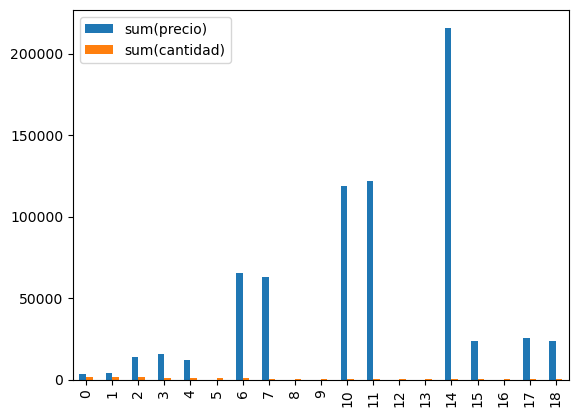

In [136]:
tendencia_ventas_df.plot(kind="bar")

plt.show()

In [138]:
spark.stop()